# <span style="color:Yellow">Imports & Settings</span>

## Import Libraries

In [1]:
# Fan favourites
import math
from IPython.display import display
import random

In [2]:
# Required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Custom Libraries

In [3]:
# nothing yet

## Self-defined Functions

In [4]:
# def get_descriptive_stats(df):
#   stats = {}
#   for col in df.columns:
#     stats[col] = {
#         "Mean": df[col].mean(skipna=True),
#         "Median": df[col].median(skipna=True),
#         "Range": df[col].max(skipna=True) - df[col].min(skipna=True),
#         "Std Dev": df[col].std(skipna=True),
#         "IQR": df[col].dropna().quantile(0.75) - df[col].dropna().quantile(0.25)  # IQR with dropna
#     }
#   return pd.DataFrame(stats)

### Colour Randomizer

In [5]:
# Set colour range
col_lo = 0x007f7f
col_hi = 0xffffff

def get_random_colour():
  colour = f'#{random.randint(col_lo, col_hi):06x}'
  return colour

def get_colour_set(length):
    colours = [f'#{random.randint(col_lo, col_hi):06x}' for _ in range(length)]
    plt.figure(figsize = (12, 1))
    for colour in colours:
        plt.bar(range(len(colours)),
                [1] * len(colours),
                label = colours,
                color = colours)
    plt.show()
    return colours

## IDE (Jupyter) Settings

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# <span style="color:Yellow">Pre-processing</span>

## Import Datafile

In [ ]:
FILE = 'Group9 - missingdata.csv'

# _For working in Google.Colab only!!
# from google.colab import drive
# drive.mount('/content/drive')
# FILE = '/content/drive/MyDrive/we love pv/Data Analytics/Group9 - missingdata.csv'

In [27]:
# import raw data
df_raw = pd.read_csv(FILE)

In [28]:
display(g9_df_raw.head(13))

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,Normal1,274.92,322.46,1445.52,87.70,29.120,325.19,0.234,309.30,3.086,314.73,1.38334,0.888447
1,Normal1,266.69,302.12,1521.99,90.97,29.678,301.82,0.224,292.32,3.058,322.99,1.35334,0.899772
2,Normal1,287.07,299.90,1504.16,93.18,NaN,301.29,0.244,NaN,3.098,297.00,1.37334,0.889388
3,Normal1,279.81,295.40,1536.42,92.58,29.876,323.39,0.244,303.88,2.938,297.65,1.40334,0.926952
4,Normal1,293.69,322.20,1505.81,NaN,29.126,307.31,0.224,281.91,3.168,324.13,1.48334,0.919580
5,Normal1,NaN,303.28,1499.84,86.40,29.316,303.78,NaN,303.91,3.090,NaN,1.41334,0.932977
6,Normal1,284.60,307.72,1446.05,93.99,27.508,309.78,0.224,281.31,2.918,309.82,1.35334,NaN
7,Normal1,278.29,321.87,1579.28,93.41,28.478,313.54,0.244,304.19,2.850,300.17,1.38334,0.935242
8,Normal1,278.14,324.31,NaN,86.60,29.758,319.46,0.244,308.84,2.896,304.51,1.44334,0.892977
9,Normal1,285.16,324.40,1549.57,92.05,30.238,329.77,0.234,284.19,2.976,319.64,1.44334,0.884110


## <span style="color:Red">Find and remove outliers?</span>

In [ ]:
# g9_df_raw.drop(index = 85, inplace = True)

## Define Unique Sets

In [9]:
df_cond = np.sort(g9_df_raw['Condition'].unique())

display(df_cond)

array(['Condition1', 'Condition7', 'Normal1'], dtype=object)

In [10]:
df_head = np.sort(g9_df_raw.columns)

display(df_head)

array(['Condition', 'Cycle time', 'Cylinder heating zone 1',
       'Cylinder heating zone 2', 'Cylinder heating zone 3',
       'Cylinder heating zone 4', 'Cylinder heating zone 5',
       'Dosage time', 'Injection time', 'Material cushion',
       'Maximum injection pressure', 'Mould temperature control unit 1',
       'Switch-over volume'], dtype=object)

## Manage NaN Values

### <span style="color:Orange">Fill all NaN values by mean of condition.</span>

In [11]:
df = df_raw.copy()

# Fill all NaN values by mean of condition.
for col in df_head[1:]:
    df[col] = df[col].fillna(df.groupby('Condition')[col].transform('mean'))

display(df)

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,Normal1,274.920000,322.460000,1445.520000,87.700000,29.120000,325.190000,0.234000,309.300000,3.086000,314.730000,1.383340,0.888447
1,Normal1,266.690000,302.120000,1521.990000,90.970000,29.678000,301.820000,0.224000,292.320000,3.058000,322.990000,1.353340,0.899772
2,Normal1,287.070000,299.900000,1504.160000,93.180000,28.883083,301.290000,0.244000,293.361667,3.098000,297.000000,1.373340,0.889388
3,Normal1,279.810000,295.400000,1536.420000,92.580000,29.876000,323.390000,0.244000,303.880000,2.938000,297.650000,1.403340,0.926952
4,Normal1,293.690000,322.200000,1505.810000,90.194583,29.126000,307.310000,0.224000,281.910000,3.168000,324.130000,1.483340,0.919580
5,Normal1,279.992917,303.280000,1499.840000,86.400000,29.316000,303.780000,0.234213,303.910000,3.090000,310.488542,1.413340,0.932977
6,Normal1,284.600000,307.720000,1446.050000,93.990000,27.508000,309.780000,0.224000,281.310000,2.918000,309.820000,1.353340,0.947207
7,Normal1,278.290000,321.870000,1579.280000,93.410000,28.478000,313.540000,0.244000,304.190000,2.850000,300.170000,1.383340,0.935242
8,Normal1,278.140000,324.310000,1544.233333,86.600000,29.758000,319.460000,0.244000,308.840000,2.896000,304.510000,1.443340,0.892977
9,Normal1,285.160000,324.400000,1549.570000,92.050000,30.238000,329.770000,0.234000,284.190000,2.976000,319.640000,1.443340,0.884110


## Sort Data

In [12]:
df.sort_index(axis = 1, inplace = True)
# df.sort_values(by = ['Condition', 'Material cushion'], inplace = True)

display(df)

,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
0,Normal1,29.120000,274.920000,309.300000,314.730000,322.460000,325.190000,3.086000,0.234000,0.888447,1445.520000,87.700000,1.383340
1,Normal1,29.678000,266.690000,292.320000,322.990000,302.120000,301.820000,3.058000,0.224000,0.899772,1521.990000,90.970000,1.353340
2,Normal1,28.883083,287.070000,293.361667,297.000000,299.900000,301.290000,3.098000,0.244000,0.889388,1504.160000,93.180000,1.373340
3,Normal1,29.876000,279.810000,303.880000,297.650000,295.400000,323.390000,2.938000,0.244000,0.926952,1536.420000,92.580000,1.403340
4,Normal1,29.126000,293.690000,281.910000,324.130000,322.200000,307.310000,3.168000,0.224000,0.919580,1505.810000,90.194583,1.483340
5,Normal1,29.316000,279.992917,303.910000,310.488542,303.280000,303.780000,3.090000,0.234213,0.932977,1499.840000,86.400000,1.413340
6,Normal1,27.508000,284.600000,281.310000,309.820000,307.720000,309.780000,2.918000,0.224000,0.947207,1446.050000,93.990000,1.353340
7,Normal1,28.478000,278.290000,304.190000,300.170000,321.870000,313.540000,2.850000,0.244000,0.935242,1579.280000,93.410000,1.383340
8,Normal1,29.758000,278.140000,308.840000,304.510000,324.310000,319.460000,2.896000,0.244000,0.892977,1544.233333,86.600000,1.443340
9,Normal1,30.238000,285.160000,284.190000,319.640000,324.400000,329.770000,2.976000,0.234000,0.884110,1549.570000,92.050000,1.443340


# <span style="color:Yellow">Summary & Stats</span>

In [13]:
df_des = {}

for condition in df_cond:
    df_des[condition] = df[df['Condition'] == condition].describe(include = 'all')
    display(df_des[condition])

,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,26,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Condition1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.966667,288.778750,306.426250,317.359167,318.146250,326.670435,2.89550,0.234417,0.913038,1489.410000,89.235000,1.417507
std,NaN,0.794227,8.971751,7.940761,9.651431,9.650574,8.579631,0.07970,0.007735,0.032232,44.489642,2.146157,0.045247
min,NaN,27.552000,275.620000,292.410000,304.460000,304.980000,312.120000,2.76200,0.224000,0.868255,1421.750000,85.570000,1.343340
25%,NaN,28.588000,281.340000,300.892500,310.022500,310.642500,319.685000,2.81850,0.226500,0.890237,1458.645000,87.877500,1.385840
50%,NaN,28.954333,288.778750,306.426250,315.540000,314.575000,326.670435,2.89575,0.234000,0.913917,1489.410000,89.122500,1.417507
75%,NaN,29.592500,297.067500,312.810000,323.395000,325.847500,335.107500,2.95050,0.244000,0.924671,1513.452500,90.835000,1.450840


,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Condition7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.392545,281.552727,295.424242,310.545455,309.118788,315.477941,2.846303,1.940000e-01,0.904566,1735.325000,89.979091,1.417162
std,NaN,0.626166,8.159180,7.866702,9.006702,8.614709,8.472093,0.080386,2.816079e-17,0.027072,43.997971,2.580665,0.038798
min,NaN,27.486000,266.700000,282.950000,295.160000,295.030000,300.380000,2.692000,1.940000e-01,0.856930,1666.610000,85.550000,1.335420
25%,NaN,29.144000,273.430000,289.520000,301.860000,301.780000,308.920000,2.786000,1.940000e-01,0.884292,1696.765000,87.620000,1.395420
50%,NaN,29.454000,283.490000,294.890000,311.400000,308.570000,315.060000,2.860000,1.940000e-01,0.908447,1735.325000,90.440000,1.415420
75%,NaN,29.815000,287.875000,300.855000,318.355000,315.560000,322.415000,2.898000,1.940000e-01,0.930328,1768.810000,91.740000,1.450985


,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Normal1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.883083,279.992917,293.361667,310.488542,309.567083,314.734468,2.955500,0.234213,0.947207,1544.233333,90.194583,1.407298
std,NaN,0.797309,7.107736,8.961685,8.627771,9.281702,9.171803,0.088607,0.008449,0.031388,46.701478,2.623928,0.044158
min,NaN,27.462000,266.330000,281.040000,295.040000,295.400000,299.710000,2.766000,0.224000,0.884110,1445.520000,85.910000,1.343340
25%,NaN,28.382500,274.975000,285.845000,304.487500,302.190000,307.815000,2.898500,0.224000,0.927411,1504.547500,87.677500,1.365840
50%,NaN,28.843542,279.700000,292.075000,310.609271,308.643542,314.734468,2.948000,0.234000,0.947207,1545.470000,90.430000,1.405319
75%,NaN,29.422000,284.532500,301.070000,317.172500,318.457500,322.852500,3.017500,0.244000,0.967802,1581.132500,92.595000,1.443340


# <span style="color:YELLOW">Understand Data</span>

## In total, how many records, how many parameters? <span style="color:green">DONE</span>

In [14]:
df_shape = pd.DataFrame({'Count':df_raw.shape}, index = ['Records', 'Parameters'])

display(df_shape)

,Count
Records,111
Parameters,13


## Is this a classification or regression issue?
### <span style="color:Orange">Classification issue.</span>

## How many different classes in the data?
### <span style="color:Orange">I have no clue.</span>

## How many records for each condition? <span style="color:green">DONE</span>

In [15]:
df_rec = df['Condition'].value_counts(dropna = False).to_frame()
display(df_rec)

,count
Condition,
Normal1,50
Condition7,35
Condition1,26


## How many null values for each condition under each parameter? <span style="color:green">DONE</span>

In [16]:
df_nc = pd.DataFrame(columns = df_cond)

for condition in df_cond:
    df_nc[condition] = df_raw[df_raw['Condition'] == condition].isnull().sum()

display(df_nc)

,Condition1,Condition7,Normal1
Condition,0,0,0
Cylinder heating zone 1,2,2,2
Cylinder heating zone 4,2,2,2
Maximum injection pressure,2,3,2
Mould temperature control unit 1,2,2,2
Cycle time,2,2,2
Cylinder heating zone 5,3,1,3
Injection time,2,2,3
Cylinder heating zone 2,2,2,2
Dosage time,2,2,2


# <span style="color:Yellow">Plot data</span>

## Cylinder heating zone

In [17]:
chz = df_head[np.array([col.startswith('Cylinder heating zone ') for col in df_head])]

display(chz)

array(['Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 4',
       'Cylinder heating zone 5'], dtype=object)

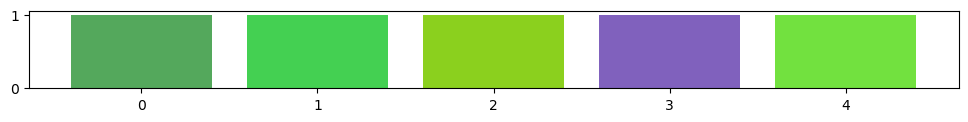

In [18]:
colours = get_colour_set(len(chz))

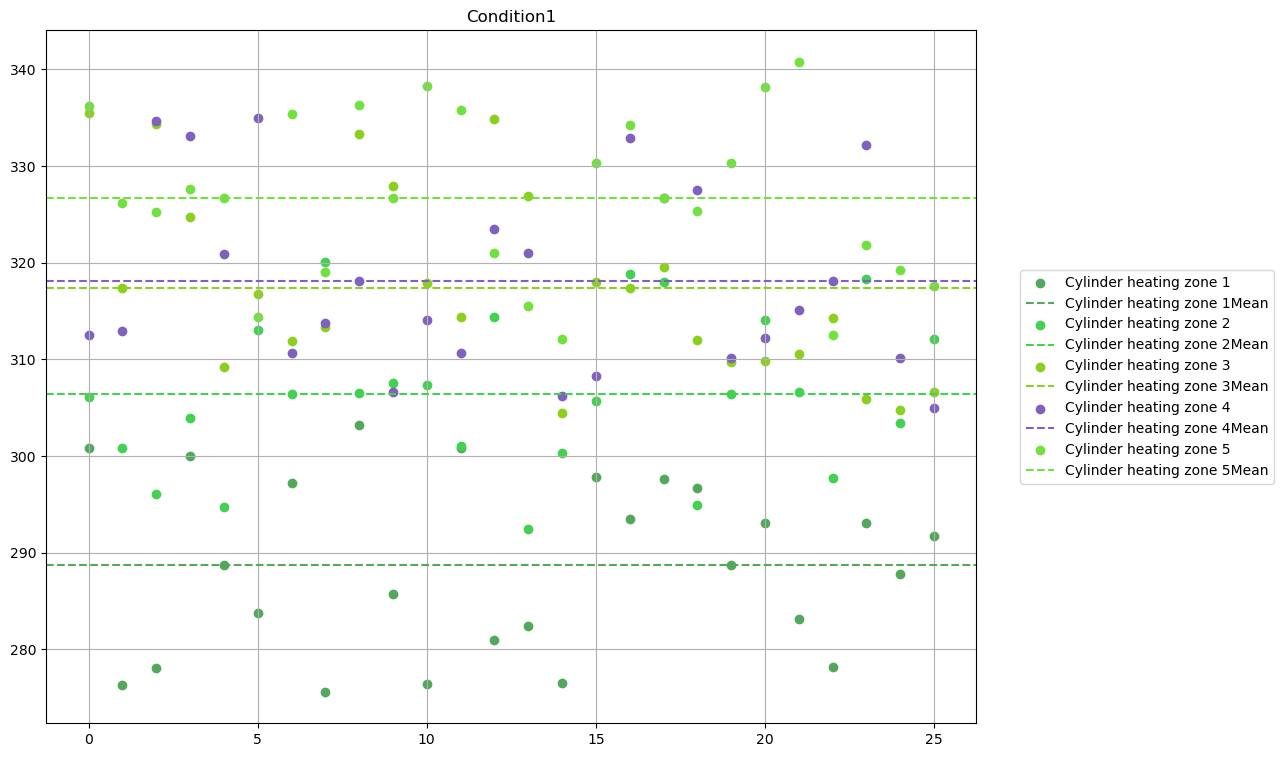

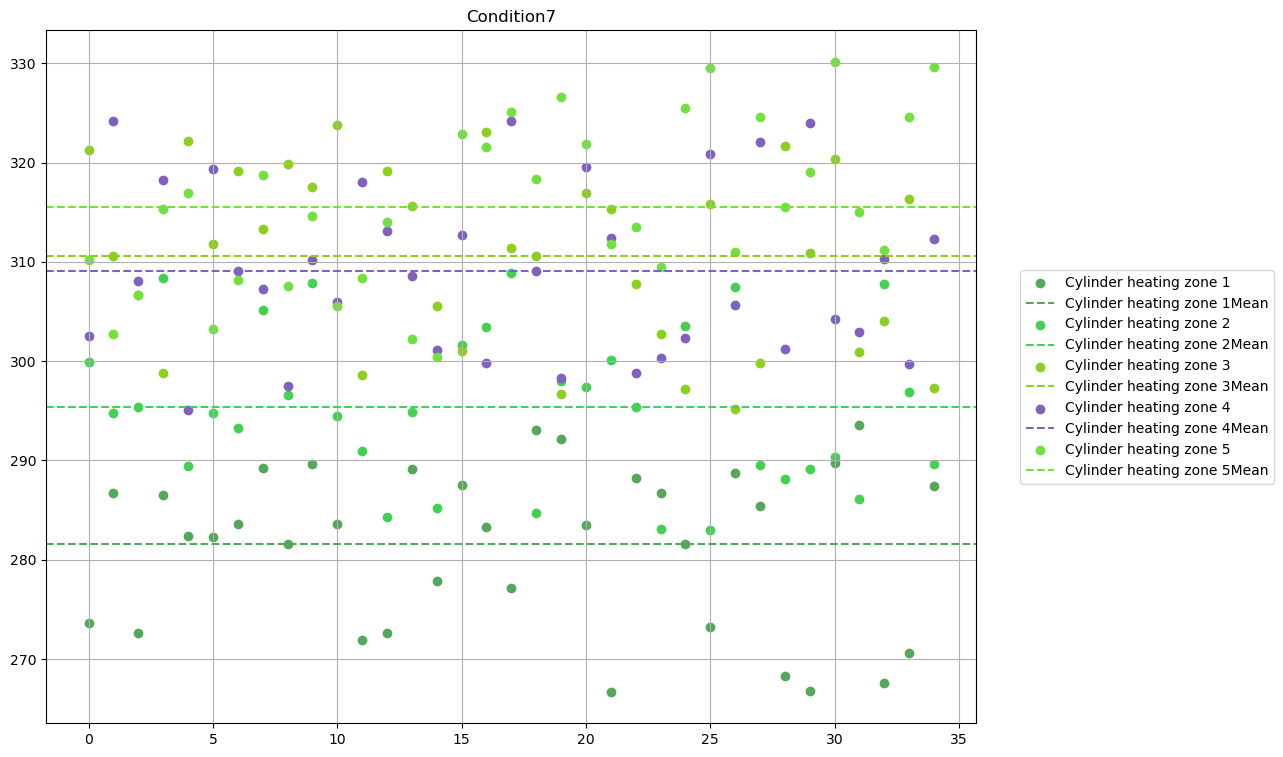

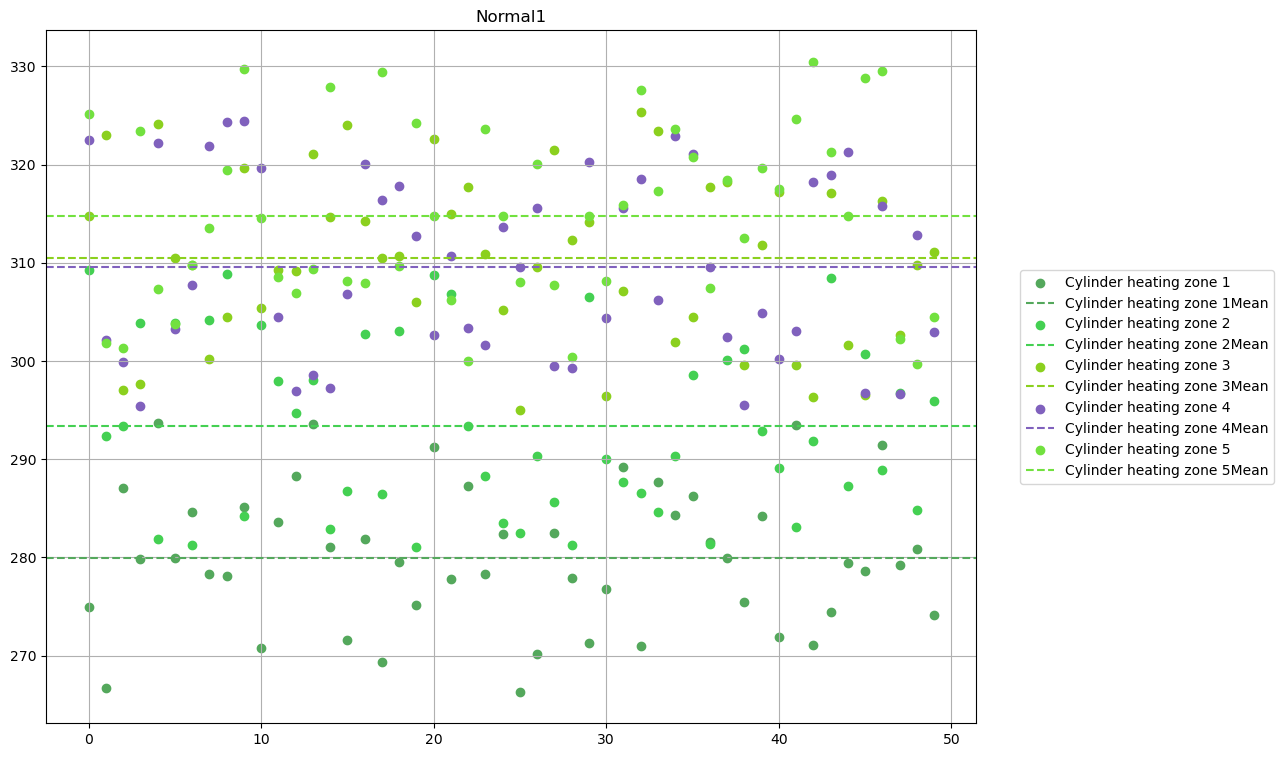

In [19]:
for condition in df_cond:
    plt.figure(figsize = (12, 9))
    for zone, colour in zip(chz, colours):
        plt.scatter(np.arange(df_des[condition]['Condition']['count']),
                    df[df['Condition'] == condition][zone],
                    label = zone,
                    color = colour)
        plt.axhline(y = df_des[condition][zone]['mean'],
                    linestyle = '--',
                    label = zone + 'Mean',
                    color = colour)
    
    plt.title(condition)
    plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
    plt.grid(True)
    plt.show()


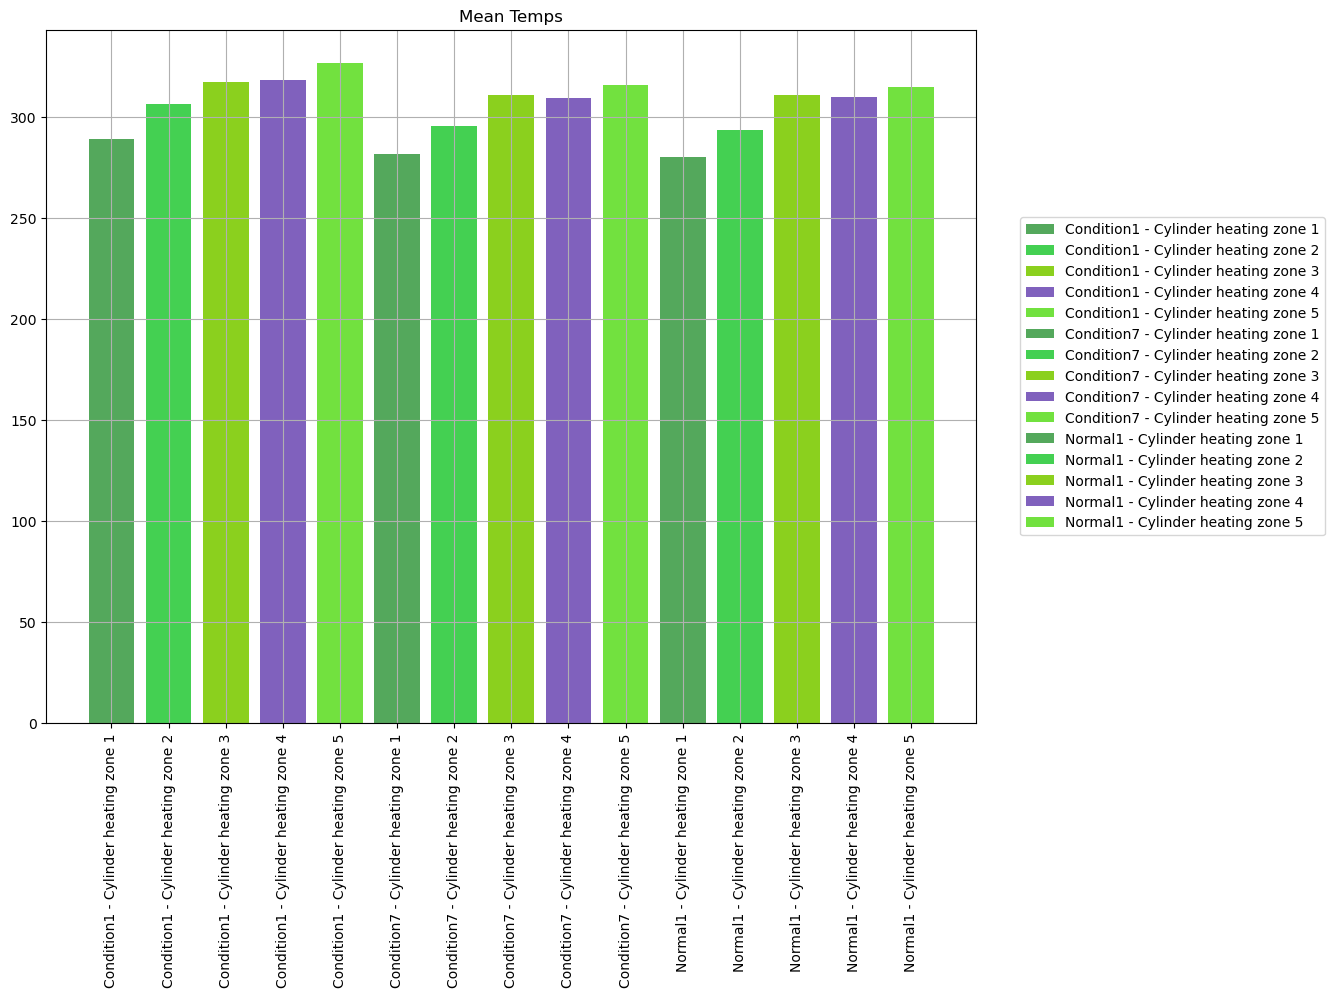

In [20]:
plt.figure(figsize = (12, 9))

for condition in df_cond:
    for zone, colour in zip(chz, colours):
        dfm = df_des[condition][zone]['mean']
        plt.bar(condition + ' - ' + zone, dfm, label = condition + ' - ' + zone, color = colour)

plt.xticks(rotation = 90)
plt.title('Mean Temps')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.grid(True)
plt.show()


## Pair Plots

In [21]:
Q = ['Material cushion', 'Switch-over volume']

display(Q)

H = [col for col in df_head if col not in ['Condition', *Q]]

display(H)

['Material cushion', 'Switch-over volume']

['Cycle time',
 'Cylinder heating zone 1',
 'Cylinder heating zone 2',
 'Cylinder heating zone 3',
 'Cylinder heating zone 4',
 'Cylinder heating zone 5',
 'Dosage time',
 'Injection time',
 'Maximum injection pressure',
 'Mould temperature control unit 1']

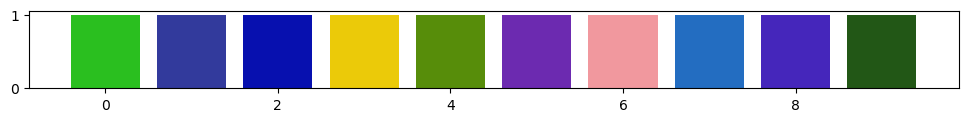

In [22]:
#Randomize colours
colours = get_colour_set(len(H))

#Hijack colours with RGB
# colours = ['r', 'g', 'b']

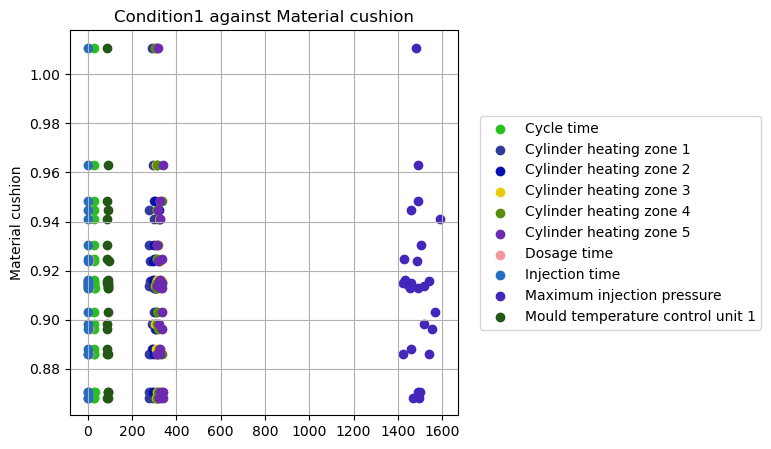

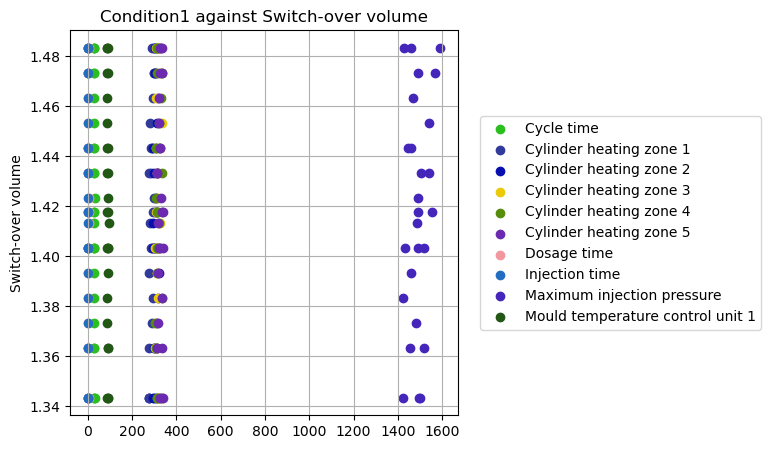

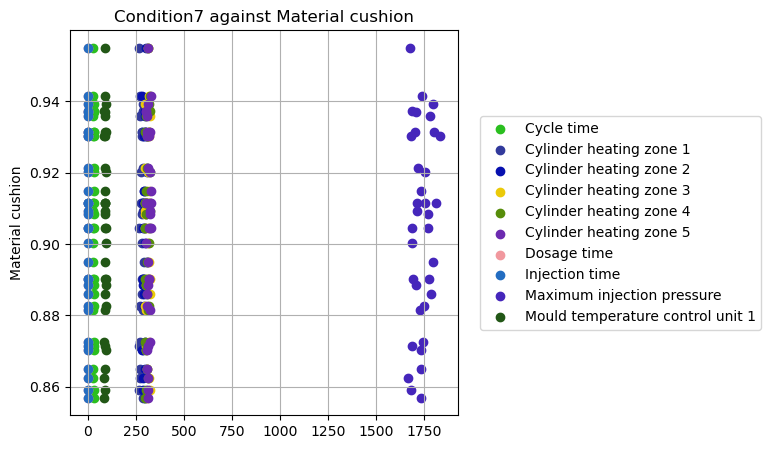

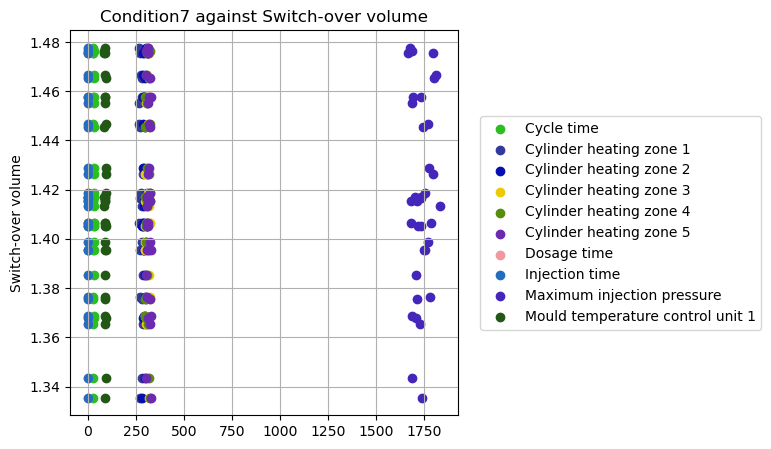

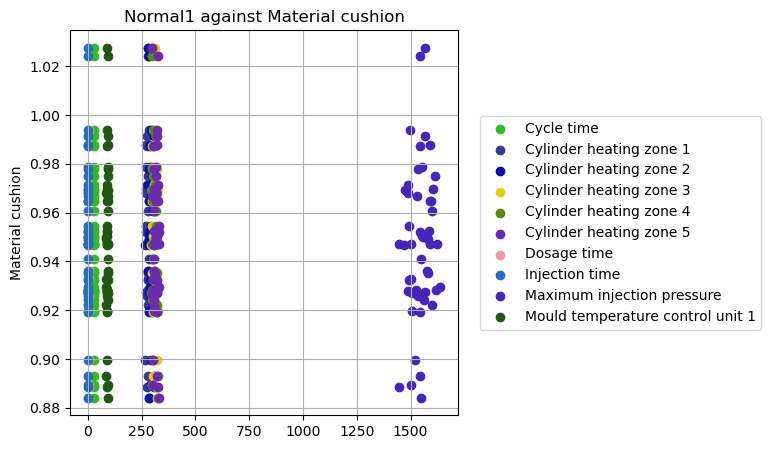

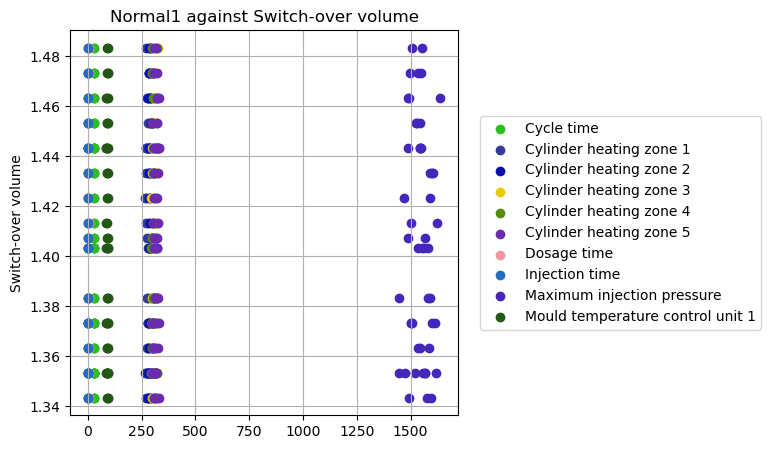

In [23]:
for condition in df_cond:
    for col in Q:
        plt.figure(figsize = (5, 5))
        for col2, colour in zip(H, colours):
            plt.scatter(df[df['Condition'] == condition][col2], df[df['Condition'] == condition][col], label = col2, color = colour)
        plt.ylabel(col)
        plt.title(condition + ' against ' + col)
        plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
        plt.grid(True)
        plt.show()
    


## Comparing Values by Condition

In [24]:
H = df_head[1:]

display(H)

colours = ['r', 'g', 'b']

array(['Cycle time', 'Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 4',
       'Cylinder heating zone 5', 'Dosage time', 'Injection time',
       'Material cushion', 'Maximum injection pressure',
       'Mould temperature control unit 1', 'Switch-over volume'],
      dtype=object)

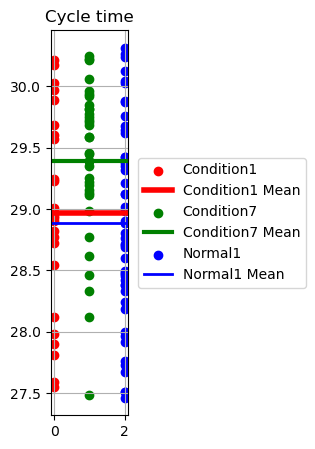

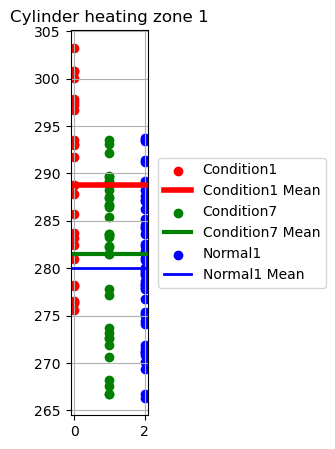

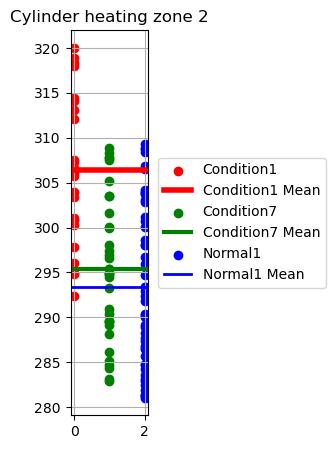

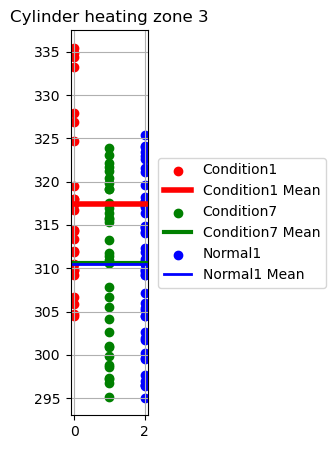

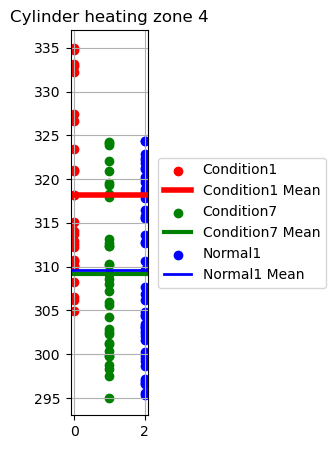

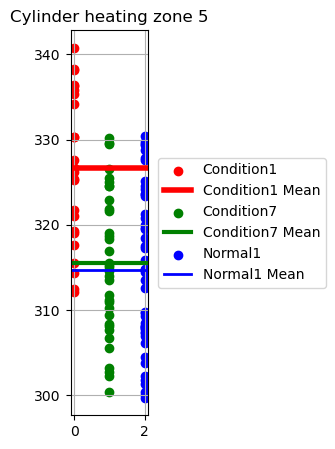

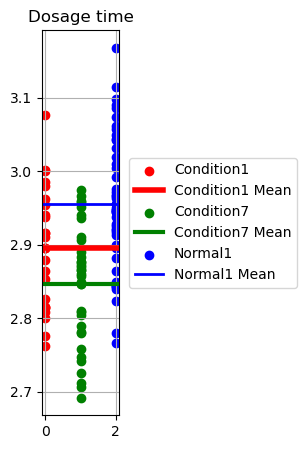

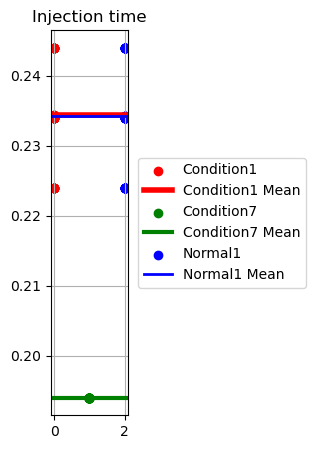

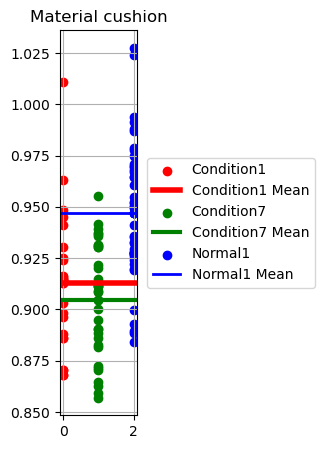

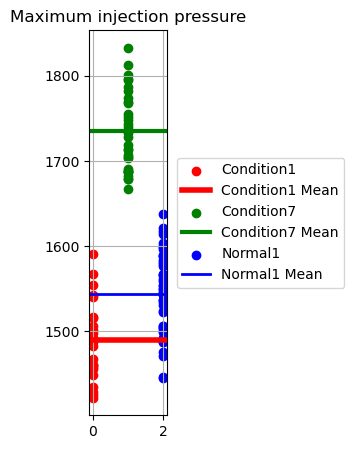

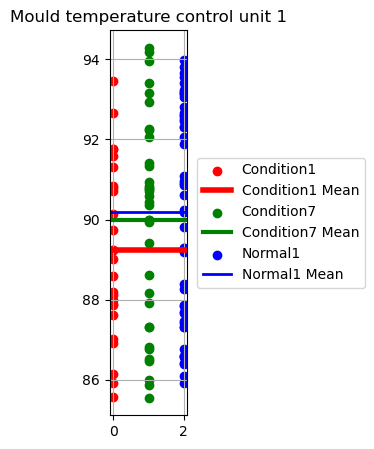

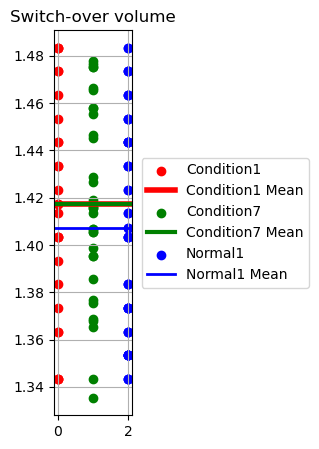

In [25]:
for col in H:
    fig, ax = plt.subplots(figsize = (1, 5))
    for i, condition, colour in zip(np.arange(len(df_cond)), df_cond, colours):
        cou = df_des[condition]['Condition']['count']
        ax.scatter(np.ones(cou) * i,
                    df[df['Condition'] == condition][col],
                    label = condition,
                    color = colour)
        # ax.axhline(y = df_des[condition][col]['max'],
        #     linestyle = '--',
        #     color = colour)
        # ax.axhline(y = df_des[condition][col]['min'],
        #     linestyle = '--',
        #     color = colour)
        ax.axhline(y = df_des[condition][col]['mean'],
                    linestyle = '-',
                    label = condition + ' Mean',
                    color = colour,
                    linewidth = 5 - (i + 1))
    # ax.set_ylim(0, df_des[condition][col]['max'])
    plt.title(col)
    plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
    plt.grid(True)
    plt.show()